<a href="https://colab.research.google.com/github/Julian-Mirkin/Examen-1er-bimestre--Julian-Mirkin/blob/main/Mirkin_Gomez_Lutteral(D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
from IPython.display import display
import pandas as pd
from typing import Tuple
from sklearn.datasets import load_wine
from sklearn import tree
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix

dataset sacado de kaggle que con target en saber si el accidentado sobrevive a un choque

In [170]:
df = pd.read_csv("https://raw.githubusercontent.com/Julian-Mirkin/tp1-chona/refs/heads/main/accident.csv")
print(df)

     Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0     56  Female             27.0          No            No         1
1     69  Female             46.0          No           Yes         1
2     46    Male             46.0         Yes           Yes         0
3     32    Male            117.0          No           Yes         0
4     60  Female             40.0         Yes           Yes         0
..   ...     ...              ...         ...           ...       ...
195   69  Female            111.0          No           Yes         1
196   30  Female             51.0          No           Yes         1
197   58    Male            110.0          No           Yes         1
198   20    Male            103.0          No           Yes         1
199   56  Female             43.0          No           Yes         1

[200 rows x 6 columns]


Se pueden ver datos en tipo string y float, por lo que habrá que pasar todo a float. Por otro lado, se puede notar del dataset que hay muchas muestras y no tantos feauters

pasamos todo a float para que se pueda entrenar en el árbol

In [171]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Helmet_Used"] = le.fit_transform(df["Helmet_Used"])
df["Seatbelt_Used"] = le.fit_transform(df["Seatbelt_Used"])

print(df)

     Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0     56       0             27.0            0              0         1
1     69       0             46.0            0              1         1
2     46       1             46.0            1              1         0
3     32       1            117.0            0              1         0
4     60       0             40.0            1              1         0
..   ...     ...              ...          ...            ...       ...
195   69       0            111.0            0              1         1
196   30       0             51.0            0              1         1
197   58       1            110.0            0              1         1
198   20       1            103.0            0              1         1
199   56       0             43.0            0              1         1

[200 rows x 6 columns]


Separamos en feautres de target y definimos train y test

In [172]:
X = df.drop(columns= ['Survived'])
y= df['Survived']
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=4, test_size=TEST_SIZE)

Uitlizamos grid-search para saber cuales son los mejores hiperparametros

In [182]:
rf = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor accuracy promedio (CV):", grid_search.best_score_)

Mejores hiperparámetros encontrados: {'max_depth': None}
Mejor accuracy promedio (CV): 0.475


Lo entrenamos con un ÁRBOL DE DECISIONES

In [174]:
arbol = DecisionTreeClassifier(max_depth=None, criterion = "entropy")
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Vemos que max-depth nos conviene

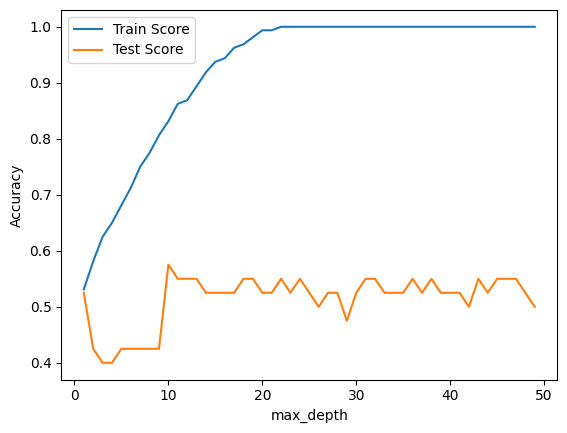

In [177]:
max_depths = range(1, 50)
train_scores = []
test_scores = []
for max_depth in max_depths:
    arbol = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy")
    arbol.fit(X_train, y_train)
    train_scores.append(arbol.score(X_train, y_train))
    test_scores.append(arbol.score(X_test, y_test))
plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Probamos en el test

Score sobre el training set: 0.83 ¿qué indica este número?
Score sobre el test set: 0.55  ¿qué indica este número?


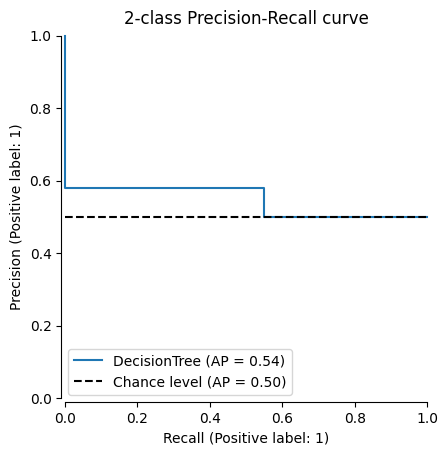

In [183]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, random_state=4, test_size=TEST_SIZE)

arbol = DecisionTreeClassifier(max_depth=10, criterion="entropy")
arbol.fit(X_train, y_train)

#implementamos métricas de Precision-Recall
display = PrecisionRecallDisplay.from_estimator(
    grid_search.best_estimator_, X_test, y_test, name="DecisionTree", plot_chance_level=True, despine=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

print(f"Score sobre el training set: {arbol.score(X_train, y_train):.2f} ¿qué indica este número?")
print(f"Score sobre el test set: {arbol.score(X_test, y_test):.2f}  ¿qué indica este número?")

Hacemos la Mátriz de Confusión


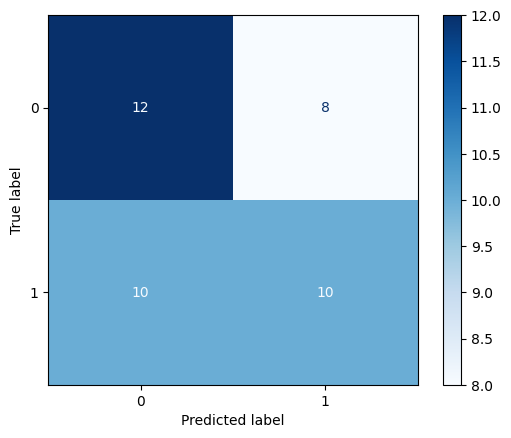

In [186]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = arbol.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()